# Case MGOC20

**Goal**  
The goal of the case is too forecast passenger arrivals. 

**Data**  
The Data given is a processed dataset.
- Form: Tabular Form
- Index: Day
- columns: Two hour shift

# Imports


In [277]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels


# Data Processing

In [278]:
df = pd.read_excel("CaseData.xls", index_col=0)

In [279]:
df.shape

(30, 10)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   4-6 AM     30 non-null     int64
 1   6-8 AM     30 non-null     int64
 2   8-10 AM    30 non-null     int64
 3   10-noon    30 non-null     int64
 4   noon-2 PM  30 non-null     int64
 5   2-4 PM     30 non-null     int64
 6   4-6 PM     30 non-null     int64
 7   6-8 PM     30 non-null     int64
 8   8-10 PM    30 non-null     int64
 9   Year       30 non-null     int64
dtypes: int64(10)
memory usage: 2.6 KB


In [281]:
df.iloc[:, :-1].describe()

,4-6 AM,6-8 AM,8-10 AM,10-noon,noon-2 PM,2-4 PM,4-6 PM,6-8 PM,8-10 PM
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3296.666667,3700.000000,3870.000000,2173.333333,2690.000000,2843.333333,2493.333333,1153.333333,353.333333
std,973.965705,634.632666,637.965516,674.630593,757.650634,666.790218,595.924858,175.643317,133.218341
min,1900.000000,2500.000000,2500.000000,200.000000,1500.000000,1800.000000,1400.000000,800.000000,200.000000
25%,2400.000000,3225.000000,3425.000000,1625.000000,2100.000000,2325.000000,2000.000000,1025.000000,300.000000
50%,3200.000000,3750.000000,4000.000000,2250.000000,2600.000000,2750.000000,2500.000000,1200.000000,300.000000
75%,4275.000000,4275.000000,4300.000000,2600.000000,3300.000000,3400.000000,3000.000000,1200.000000,400.000000
max,4900.000000,4600.000000,5100.000000,3300.000000,4000.000000,4000.000000,3400.000000,1500.000000,700.000000


In [282]:
df

,4-6 AM,6-8 AM,8-10 AM,10-noon,noon-2 PM,2-4 PM,4-6 PM,6-8 PM,8-10 PM,Year
Day,,,,,,,,,,
1,2400,2700,3200,1400,1700,1800,1600,800,200,1
2,1900,2500,3100,1600,1800,2000,1800,900,300,1
3,2300,3100,2500,1500,1500,1800,1900,1100,200,1
4,2200,3200,3100,2200,1900,2400,2100,1200,400,1
5,2400,3300,3400,1700,2200,2100,2000,1000,600,1
6,2600,2800,3500,1500,1700,1900,1500,1100,300,1
7,1900,2800,3100,1200,1500,2000,1400,900,400,1
8,2000,2700,2500,1500,2000,2300,1900,1000,200,1
9,2400,3200,3600,1600,2100,2500,1800,1400,200,1


In [283]:
# Convert to 1d Array
data1d = df.iloc[:, :-1].to_numpy().reshape(270)
data1d

array([2400, 2700, 3200, 1400, 1700, 1800, 1600,  800,  200, 1900, 2500,
       3100, 1600, 1800, 2000, 1800,  900,  300, 2300, 3100, 2500, 1500,
       1500, 1800, 1900, 1100,  200, 2200, 3200, 3100, 2200, 1900, 2400,
       2100, 1200,  400, 2400, 3300, 3400, 1700, 2200, 2100, 2000, 1000,
        600, 2600, 2800, 3500, 1500, 1700, 1900, 1500, 1100,  300, 1900,
       2800, 3100, 1200, 1500, 2000, 1400,  900,  400, 2000, 2700, 2500,
       1500, 2000, 2300, 1900, 1000,  200, 2400, 3200, 3600, 1600, 2100,
       2500, 1800, 1400,  200, 2600, 3300, 3100,  200, 2500, 2600, 2400,
       1100,  400, 3100, 3900, 4100, 2200, 2600, 2300, 2500, 1100,  300,
       2800, 3400, 3900, 1900, 2100, 2500, 2000, 1200,  300, 2700, 3800,
       4300, 2100, 2400, 2400, 2400, 1200,  400, 2400, 3500, 4100, 2400,
       3000, 3200, 2600, 1200,  700, 3300, 3700, 4000, 2600, 2600, 2700,
       2900, 1000,  300, 3500, 4000, 3800, 2300, 2700, 3100, 3000,  900,
        200, 2900, 4100, 3900, 2400, 3000, 3200, 25

In [284]:
# Year 1 data
data1d[:90]

array([2400, 2700, 3200, 1400, 1700, 1800, 1600,  800,  200, 1900, 2500,
       3100, 1600, 1800, 2000, 1800,  900,  300, 2300, 3100, 2500, 1500,
       1500, 1800, 1900, 1100,  200, 2200, 3200, 3100, 2200, 1900, 2400,
       2100, 1200,  400, 2400, 3300, 3400, 1700, 2200, 2100, 2000, 1000,
        600, 2600, 2800, 3500, 1500, 1700, 1900, 1500, 1100,  300, 1900,
       2800, 3100, 1200, 1500, 2000, 1400,  900,  400, 2000, 2700, 2500,
       1500, 2000, 2300, 1900, 1000,  200, 2400, 3200, 3600, 1600, 2100,
       2500, 1800, 1400,  200, 2600, 3300, 3100,  200, 2500, 2600, 2400,
       1100,  400])

In [285]:
df_view = pd.DataFrame({"arrivals": data1d})  
df_view

,arrivals
0,2400
1,2700
2,3200
3,1400
4,1700
...,...
265,4000
266,3700
267,3400
268,1200


In [286]:
# Creating Year Column
year = np.concatenate((
    np.full(shape = 90, fill_value = 1),
    np.full(shape = 90, fill_value = 2),
    np.full(shape = 90, fill_value = 3),
))


In [287]:
df_view['year'] = year

In [288]:
# Creating Day column
day = np.array([])
for i in range(1,31):
    day = np.concatenate((day, np.full(shape = 9, fill_value = i)))

In [289]:
df_view['day'] = day

In [290]:
df_view

,arrivals,year,day
0,2400,1,1.0
1,2700,1,1.0
2,3200,1,1.0
3,1400,1,1.0
4,1700,1,1.0
...,...,...,...
265,4000,3,30.0
266,3700,3,30.0
267,3400,3,30.0
268,1200,3,30.0


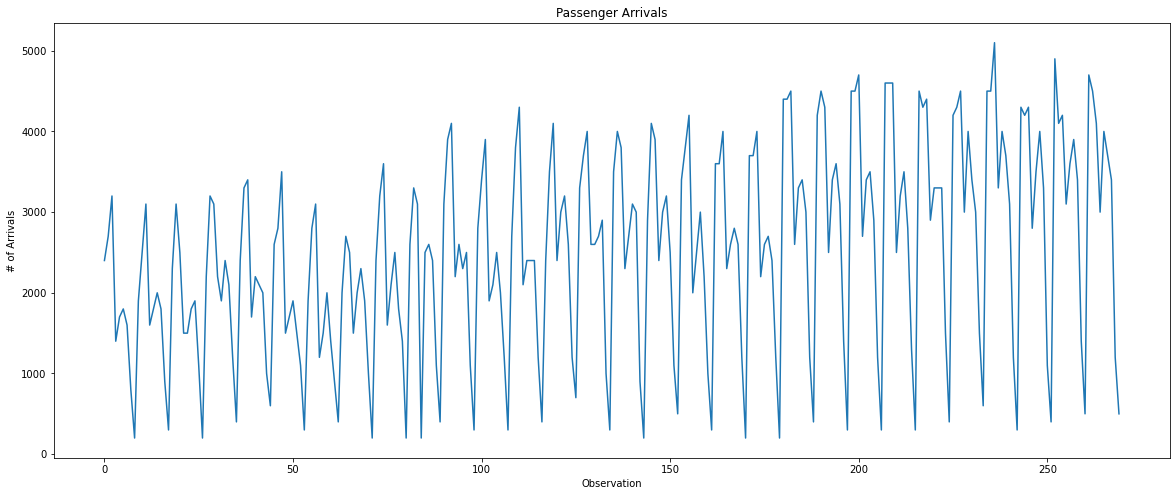

In [291]:
plt.figure(figsize=(20,8))
plt.plot(df_view['arrivals'])
plt.title("Passenger Arrivals")
plt.xlabel("Observation")
plt.ylabel("# of Arrivals")
plt.show()

In [292]:
t_stat, pvalue, lags, _, fivepercent, _ = sm.tsa.stattools.adfuller(df_view['arrivals'])
print(f"t stat: {t_stat}, pvalue: {pvalue}, lags used: {lags}, \ncriticalvals: {fivepercent}")

t stat: -1.1006609274720531, pvalue: 0.7148082629631284, lags used: 9, 
criticalvals: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


In [293]:
df_view["lag_1"] = df_view['arrivals'].diff(1)

In [294]:
df_view

,arrivals,year,day,lag_1
0,2400,1,1.0,NaN
1,2700,1,1.0,300.0
2,3200,1,1.0,500.0
3,1400,1,1.0,-1800.0
4,1700,1,1.0,300.0
...,...,...,...,...
265,4000,3,30.0,1000.0
266,3700,3,30.0,-300.0
267,3400,3,30.0,-300.0
268,1200,3,30.0,-2200.0


In [295]:
t_stat, pvalue, lags, _, fivepercent, _ = sm.tsa.stattools.adfuller(df_view['lag_1'].dropna())
print(f"t stat: {t_stat}, pvalue: {pvalue}, lags used: {lags}, \ncriticalvals: {fivepercent}")

t stat: -7.538233883403349, pvalue: 3.4327156955095524e-11, lags used: 16, 
criticalvals: {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}


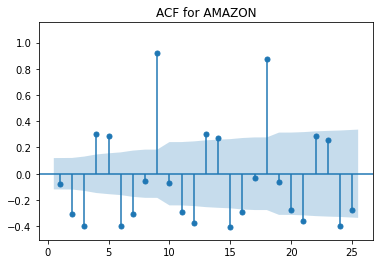

In [296]:
sm.graphics.tsa.plot_acf(df_view['lag_1'].dropna(), zero = False, auto_ylims = True)
plt.title("ACF for AMAZON")
plt.show()

/Users/guozixian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


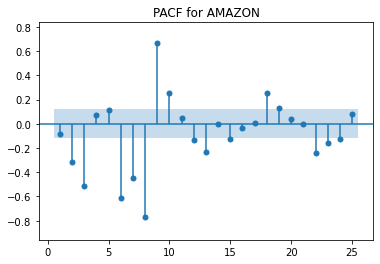

In [297]:
sm.graphics.tsa.plot_pacf(df_view['lag_1'].dropna(), zero = False, auto_ylims = True)
plt.title("PACF for AMAZON")
plt.show()

# Model

In [298]:
model=sm.tsa.statespace.SARIMAX(df_view['arrivals'], order=(1, 1, 1), seasonal_order=(2,1,3,9))
results=model.fit()
results.aic

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90173D+00    |proj g|=  6.91981D-02

At iterate    5    f=  6.88987D+00    |proj g|=  2.59579D-02

At iterate   10    f=  6.88487D+00    |proj g|=  1.14476D-02

At iterate   15    f=  6.88210D+00    |proj g|=  8.70653D-03

At iterate   20    f=  6.88168D+00    |proj g|=  1.69313D-03

At iterate   25    f=  6.88064D+00    |proj g|=  1.57948D-02

At iterate   30    f=  6.85018D+00    |proj g|=  8.83191D-02

At iterate   35    f=  6.84695D+00    |proj g|=  2.83730D-03

At iterate   40    f=  6.84677D+00    |proj g|=  1.97507D-03

At iterate   45    f=  6.84672D+00    |proj g|=  4.71807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

3713.2296029363733

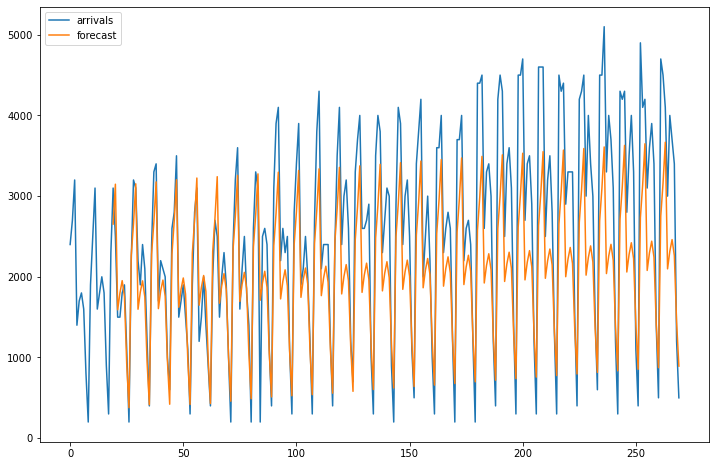

In [299]:
df_view['forecast']=results.predict(start=19,end=270,dynamic=True)
df_view[['arrivals','forecast']].plot(figsize=(12,8))
plt.show()

In [300]:
modelresults = {}

In [301]:
for p in range(1,3):
        for q in range(1,3):
            for P  in range(1,3):
                    for Q in range(1,3):
                        model=sm.tsa.statespace.SARIMAX(df_view['arrivals'], order=(p, 1, q), seasonal_order=(P,1,Q,9))
                        results=model.fit(disp = 0)
                        modelresults[f"p: {q}, d: 1, q: {q} P:{P}, D: 1, Q: {Q}, S: 9"] =  f"AIC :{results.aic}"
            

/Users/guozixian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/guozixian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/guozixian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/guozixian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [302]:
modelresults

{'p: 1, d: 1, q: 1 P:1, D: 1, Q: 1, S: 9': 'AIC :3712.0551535529526',
 'p: 1, d: 1, q: 1 P:1, D: 1, Q: 2, S: 9': 'AIC :3714.3743110038868',
 'p: 1, d: 1, q: 1 P:2, D: 1, Q: 1, S: 9': 'AIC :3712.7848347102235',
 'p: 1, d: 1, q: 1 P:2, D: 1, Q: 2, S: 9': 'AIC :3726.589042946556',
 'p: 2, d: 1, q: 2 P:1, D: 1, Q: 1, S: 9': 'AIC :3715.291959772411',
 'p: 2, d: 1, q: 2 P:1, D: 1, Q: 2, S: 9': 'AIC :3715.886011564959',
 'p: 2, d: 1, q: 2 P:2, D: 1, Q: 1, S: 9': 'AIC :3715.8827301556094',
 'p: 2, d: 1, q: 2 P:2, D: 1, Q: 2, S: 9': 'AIC :3722.4791759216805'}

In [342]:
model=sm.tsa.statespace.SARIMAX(df_view['arrivals'], order=(1, 1, 1), seasonal_order=(1,1,2,9))
results=model.fit(disp = 0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               arrivals   No. Observations:                  270
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 9)   Log Likelihood               -1850.327
Date:                                Wed, 02 Nov 2022   AIC                           3712.655
Time:                                        15:45:21   BIC                           3734.019
Sample:                                             0   HQIC                          3721.243
                                                - 270                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3330      0.046      7.302      0.000       0.244       0.422
ma.L1         -1.0000      0.069    -14.528      0.000      -1.135      -0.865
ar.S.L9       -0.1030      0.514     -0.200      0.841      -1.110       0.904
ma.S.L9       -0.4088      0.508     -0.804      0.421      -1.405       0.588
ma.S.L18      -0.1746      0.286     -0.611      0.541      -0.734       0.385
sigma2      8.553e+04   8.09e-07   1.06e+11      0.000    8.55e+04    8.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                21.54
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.72e+27. Standard errors may be unstable.
"""

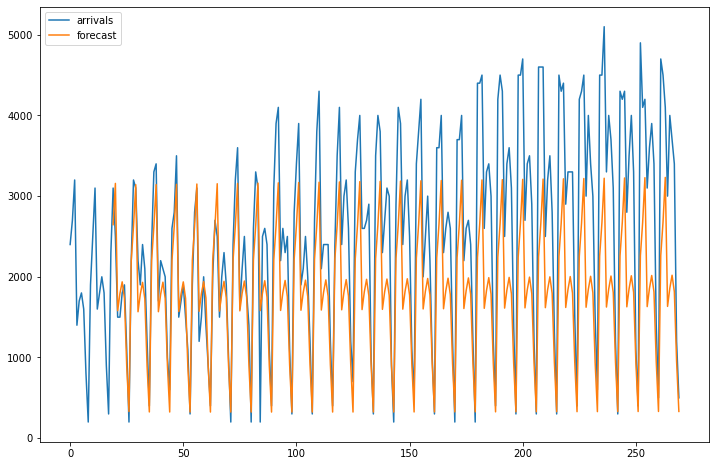

In [341]:
df_view['forecast']=results.predict(start=19,end=270,dynamic=True)
df_view[['arrivals','forecast']].plot(figsize=(12,8))
plt.show()

In [336]:
df_view

,arrivals,year,day,lag_1,forecast,forecastoutward
0,2400,1,1.0,NaN,NaN,NaN
1,2700,1,1.0,300.0,NaN,NaN
2,3200,1,1.0,500.0,NaN,NaN
3,1400,1,1.0,-1800.0,NaN,NaN
4,1700,1,1.0,300.0,NaN,NaN
...,...,...,...,...,...,...
265,4000,3,30.0,1000.0,2315.267279,NaN
266,3700,3,30.0,-300.0,2458.407612,NaN
267,3400,3,30.0,-300.0,2259.857531,NaN
268,1200,3,30.0,-2200.0,1440.482608,NaN


In [337]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [339]:
print(mean_absolute_error(df_view.iloc[19:270,  1],df_view['forecast'][19:270]))
print(mean_squared_error(df_view.iloc[19:270,  1],df_view['forecast'][19:270]))
print(mean_absolute_percentage_error(df_view.iloc[19:270,  1],df_view['forecast'][19:270]))

2072.4820123181603
4941381.913799272
1167.2212643988116


# Forecast

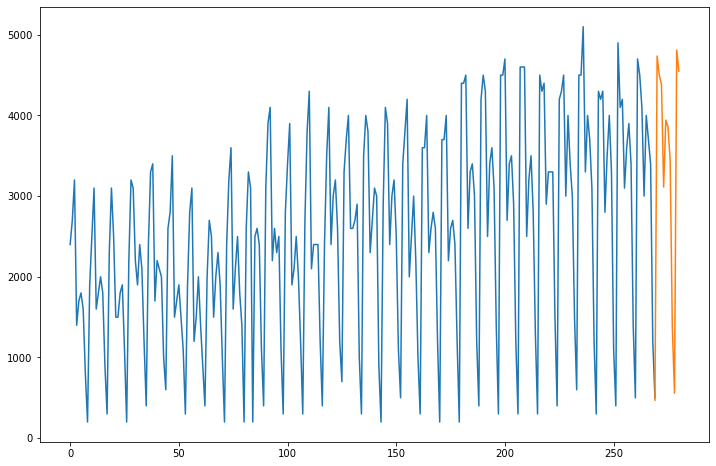

In [315]:
forecastoutward=results.predict(start=269,end=280, dynamic = True)
df_view['arrivals'].plot(figsize=(12,8))
forecastoutward.plot()
plt.show()

In [306]:
df_view

,arrivals,year,day,lag_1,forecast,forecastoutward
0,2400,1,1.0,NaN,NaN,NaN
1,2700,1,1.0,300.0,NaN,NaN
2,3200,1,1.0,500.0,NaN,NaN
3,1400,1,1.0,-1800.0,NaN,NaN
4,1700,1,1.0,300.0,NaN,NaN
...,...,...,...,...,...,...
265,4000,3,30.0,1000.0,2283.940262,NaN
266,3700,3,30.0,-300.0,2432.511096,NaN
267,3400,3,30.0,-300.0,2233.392888,NaN
268,1200,3,30.0,-2200.0,1403.261336,NaN


In [316]:
# Predictions
forecastoutward

269     470.602077
270    4736.442087
271    4497.308787
272    4387.372408
273    3112.563602
274    3943.011156
275    3857.997438
276    3442.029344
277    1361.745615
278     556.836027
279    4811.009507
280    4549.086571
Name: predicted_mean, dtype: float64